# BasicCNN_Model_2



## 1. Importing and loading the preprocessed dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


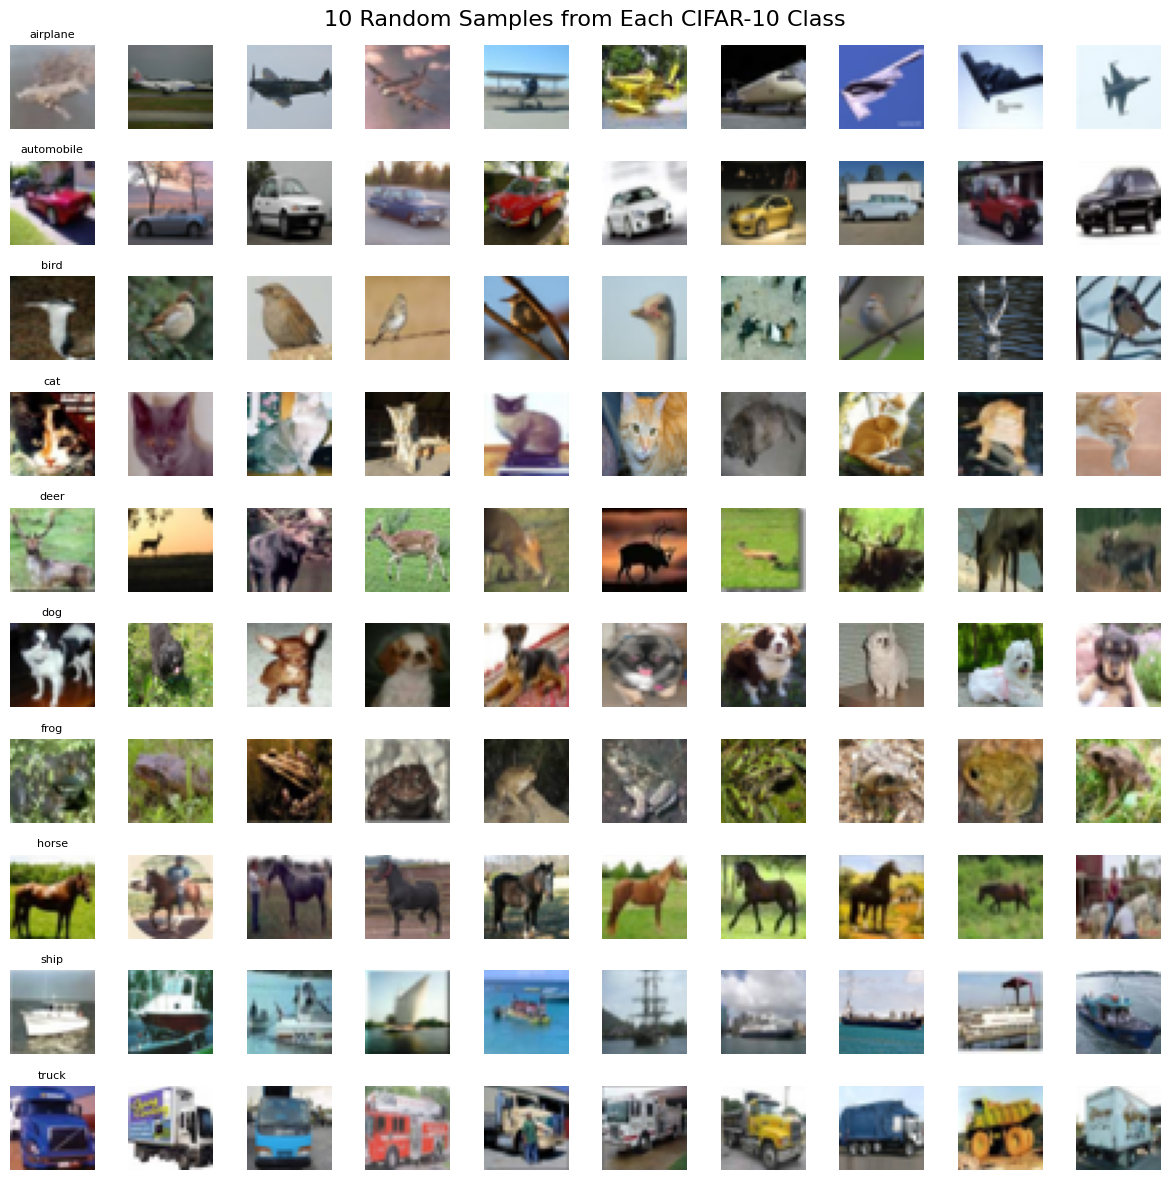

In [1]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

 ## 2. Model building

In [2]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


#### 2.1 Define callbacks to minimize overfitting during the training

In [3]:
# We will now define callbacks to control overfitting:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
]


The callback, `EarlyStopping`, monitors the model's performance during training and stops the training process if the validation metric (by default, validation loss) does not improve for a specified number of epochs, set here by `patience=5`. This means if the model does not get better for 5 consecutive epochs, training will halt early, preventing unnecessary computation and reducing the risk of overfitting. The argument `restore_best_weights=True` ensures that after stopping, the model's weights are reverted to those from the epoch with the best validation performance, rather than the final epoch.

#### 2.2 Defining model architecture

In this model, we experimented by adding an additional convolutional layer for each set of filters—32, 64, and 128—compared to previous versions. This means that instead of having just one convolutional layer per filter size, we now have two consecutive convolutional layers for each filter group before applying pooling and dropout. This architectural change allows the network to learn more complex and abstract features at each level, potentially improving its ability to capture patterns in the data and leading to better overall performance.

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

model = models.Sequential()

# Layer 1: Conv → BN
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 2: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Layer 3: Conv → BN
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 4: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Layer 5: Conv → BN
model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Layer 6: Conv → BN → MaxPool → Dropout
model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Flatten before dense layers
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dropout(0.25))

# Output Layer
model.add(layers.Dense(10, 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

## 3. Model training

#### 3.1 Compiling the model

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#### 3.2 Fitting the model to the training data

In [ ]:
# Fitting the model, including the callbacks and decreasing the epochs to 50:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/50
704/704 - 25s - 36ms/step - accuracy: 0.3131 - loss: 1.9624 - val_accuracy: 0.3982 - val_loss: 1.6378
Epoch 2/50
704/704 - 6s - 8ms/step - accuracy: 0.4275 - loss: 1.5645 - val_accuracy: 0.4818 - val_loss: 1.4929
Epoch 3/50
704/704 - 5s - 8ms/step - accuracy: 0.4837 - loss: 1.4224 - val_accuracy: 0.5396 - val_loss: 1.3141
Epoch 4/50
704/704 - 5s - 8ms/step - accuracy: 0.5258 - loss: 1.3167 - val_accuracy: 0.5666 - val_loss: 1.2567
Epoch 5/50
704/704 - 10s - 15ms/step - accuracy: 0.5632 - loss: 1.2192 - val_accuracy: 0.5990 - val_loss: 1.1633
Epoch 6/50
704/704 - 10s - 14ms/step - accuracy: 0.5947 - loss: 1.1370 - val_accuracy: 0.6540 - val_loss: 0.9799
Epoch 7/50
704/704 - 6s - 8ms/step - accuracy: 0.6263 - loss: 1.0595 - val_accuracy: 0.6660 - val_loss: 0.9608
Epoch 8/50
704/704 - 10s - 15ms/step - accuracy: 0.6454 - loss: 0.9973 - val_accuracy: 0.6456 - val_loss: 1.0367
Epoch 9/50
704/704 - 10s - 15ms/step - accuracy: 0.6669 - loss: 0.9397 - val_accuracy: 0.6820 - val_loss

#### 3.3 Plot training history (loss/accuracy curves)

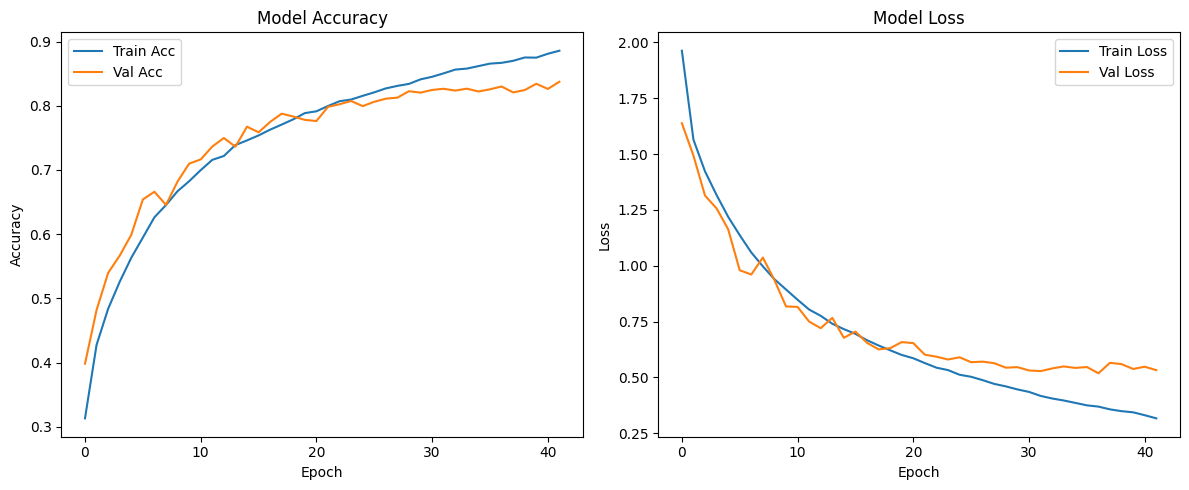

In [7]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Model evaluation

#### 4.1 Evaluate on the test set

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Test accuracy: 0.8214
Test loss: 0.5550


#### 4.2 Calculate metrics: Precision, recall, F1 score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert one-hot encoded labels and predictions to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score, using 'macro' average, as the classes are balanced (6k images per class)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Precision: 0.8232
Recall: 0.8214
F1 Score: 0.8208


#### 4.3 Confusion matrix and classification report

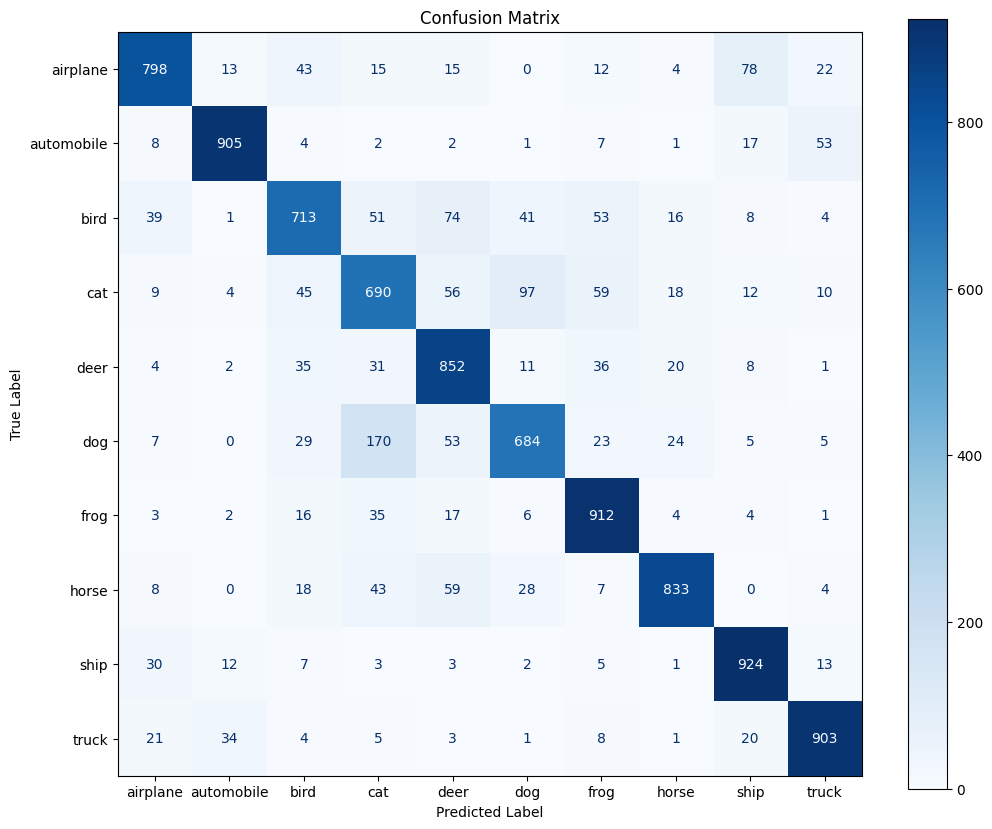

Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.80      0.83      1000
  automobile       0.93      0.91      0.92      1000
        bird       0.78      0.71      0.75      1000
         cat       0.66      0.69      0.67      1000
        deer       0.75      0.85      0.80      1000
         dog       0.79      0.68      0.73      1000
        frog       0.81      0.91      0.86      1000
       horse       0.90      0.83      0.87      1000
        ship       0.86      0.92      0.89      1000
       truck       0.89      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

## 5. Results and conclusion

In this 3rd model, we've changed the model architecture, adding 2 Conv layers per batch of filters (32, 64 and 128) instead of 1. Also, we've reduced the 'patience' of the EarlyStopping from 10 to 5, to ensure that we decrease the probability of overfitting in the model. After this, and looking at the accuracy and loss curves in the graphs, we can confirm that not only we've achieved a better accuracy and val_loss results, 0.8214 and 0.5550 respectively, but also reduced the overfitting, as we can see a clearer convergence of train_accuracy and train_loss with val_accuracy and val_loss, demonstrating the reduction in overfitting.